In [1]:
# %matplotlib widget

import sys
import os
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from data_io import read_iq_data
from visualisation import PDRPlotter
from interference_utils import pdr_vs_snr_analysis_parallel
from receiver import ReceiverType, DemodulationType
from demodulation import TEDType

# BLE example

In [2]:
bw_snrs: dict = {"BLE": 1.5e6, "IEEE802154": 3e6}
filenames: dict = {"BLE": "BLE_0dBm.dat", "IEEE802154": "802154_0dBm.dat"}  # Open BLE file

fs = 10e6  # Hz
receiver_type: ReceiverType = "BLE"
iq_samples: np.ndarray = read_iq_data(f"../../capture_nRF/data/new/{filenames[receiver_type]}")
demodulation_type: DemodulationType = "INSTANTANEOUS_FREQUENCY"
ted_type: TEDType = "MOD_MUELLER_AND_MULLER"

snr_range = range(10, 20, 1)
noise_realisations = int(1e4)

In [3]:
pdr_inst_freq: dict = pdr_vs_snr_analysis_parallel(
    iq_samples=iq_samples,
    snr_range=snr_range,
    bw_snr=bw_snrs[receiver_type],
    fs=fs,
    receiver_type=receiver_type,
    demodulation_type="INSTANTANEOUS_FREQUENCY",
    ted_type="MOD_MUELLER_AND_MULLER",
    noise_realisations=noise_realisations,
)

pdr_band_pass: dict = pdr_vs_snr_analysis_parallel(
    iq_samples=iq_samples,
    snr_range=snr_range,
    bw_snr=bw_snrs[receiver_type],
    fs=fs,
    receiver_type=receiver_type,
    demodulation_type="BAND_PASS",
    ted_type="MOD_MUELLER_AND_MULLER",
    noise_realisations=noise_realisations,
)

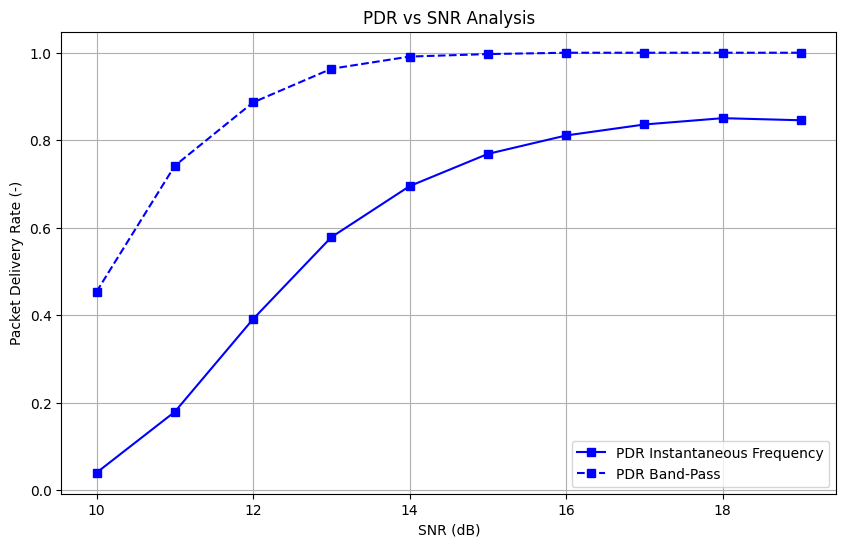

In [5]:
plotter = PDRPlotter()
plotter.add_trace(pdr_inst_freq, "PDR Instantaneous Frequency", colour="blue", linestyle="-", marker="s")
plotter.add_trace(pdr_band_pass, "PDR Band-Pass", colour="blue", linestyle="--", marker="s")
plotter.plot(title="PDR vs SNR Analysis")

# IEEE 802.15.4 example 